# Employee Test Data




# Section 1 (Data Exploration and Visualization):

In this section, I do data exploration and visualization. I want to analyze which varables are potentially informative of the decision of an employee to leave the company. Below each graph, I explain the what I find in the data in simple terms.



In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load Data
df = pd.read_csv( 'Employee Test data No. 1.csv' )

## Drop useless variables
df.drop('EmployeeCount',axis = 1, inplace = True)  ## no variation
df.drop('Over18',axis = 1, inplace = True) ## no variation
df.drop('StandardHours',axis = 1, inplace = True) ## no variation
df.drop('EmployeeNumber',axis = 1, inplace = True) ## not informative of anything

In [3]:
print('Number of Missing Observations =', df.isna().sum().sum()) ## no missing obs

Number of Missing Observations = 0


No     0.84
Yes    0.16
Name: Attrition, dtype: float64


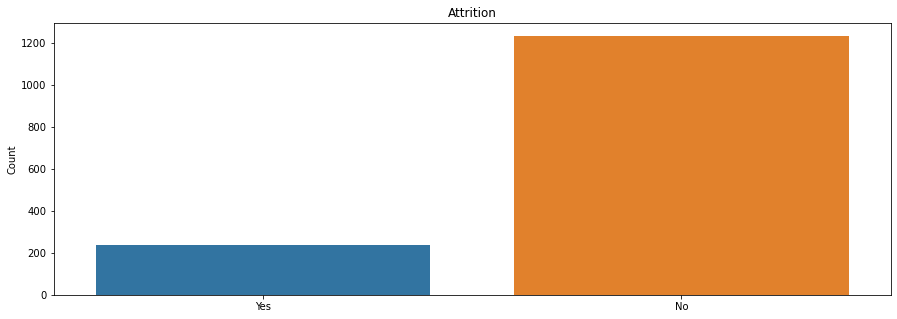

In [4]:
print(np.round(df['Attrition'].value_counts(normalize = True),2))
plt.figure(figsize = (15,5))
sns.countplot(data = df, x ='Attrition' )
plt.title('Attrition')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

The above graph shows the number of observations for Attrition. Almost 16% of the employees already left the company, and the remaining 84% are current employees. In the following, I provide insights how other variables in the data set are related to the Attrition variable.

In [5]:
list_col_catgorical = list(df.loc[:,(df.dtypes == 'object')].columns)
df_nunq = df.drop(list_col_catgorical,axis = 1).nunique().rename('n_unq').sort_values().to_frame()
list_col_catgorical.extend(list(df_nunq[df_nunq['n_unq']<=5].index))  
list_col_catgorical.remove('Attrition')
list_col_catgorical.remove('JobRole')  ## the tick labels are long

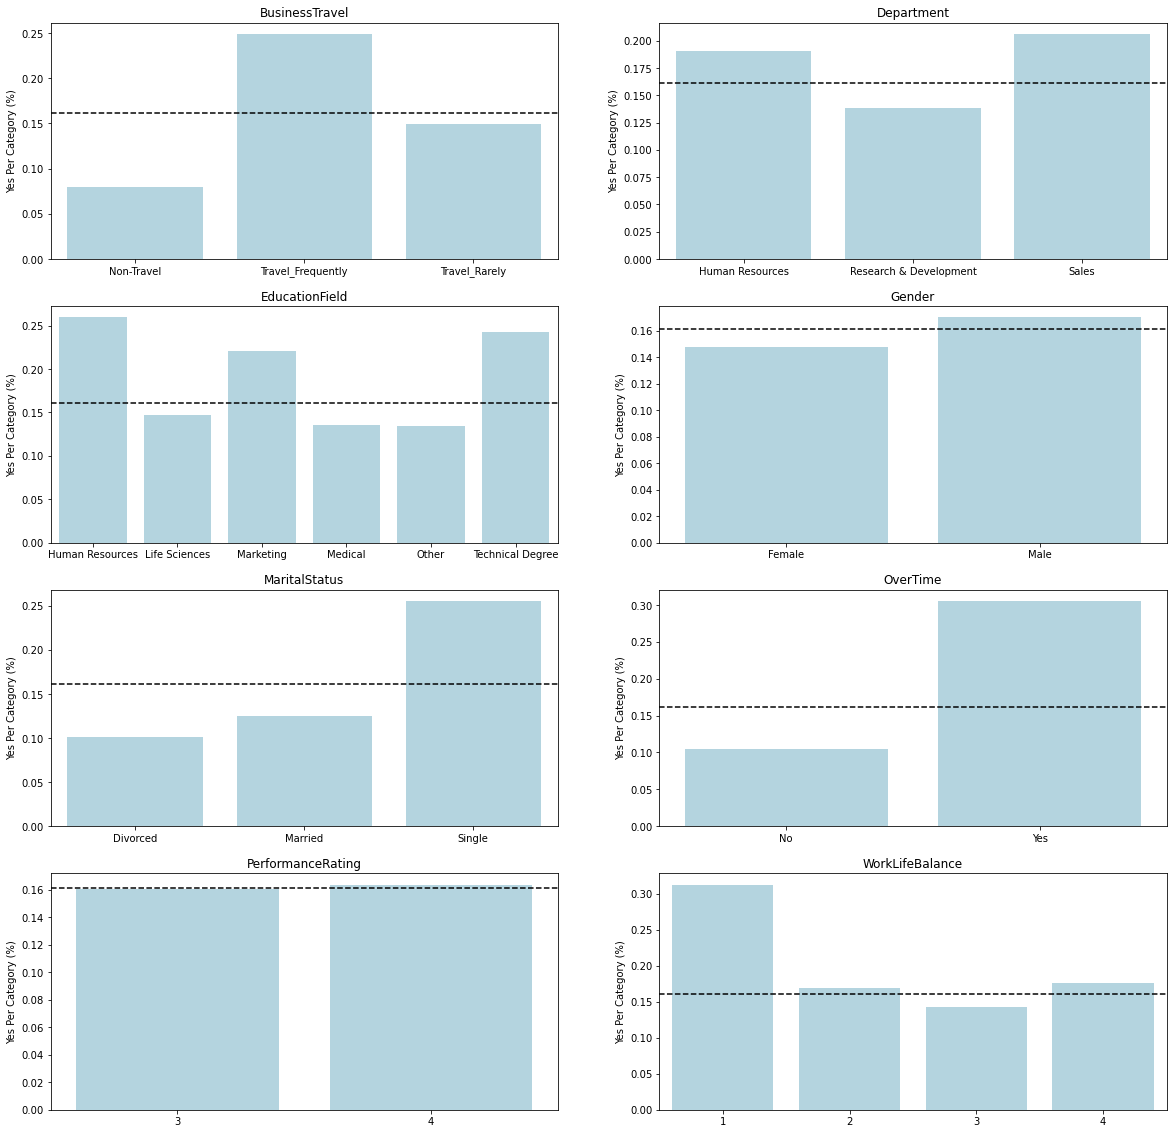

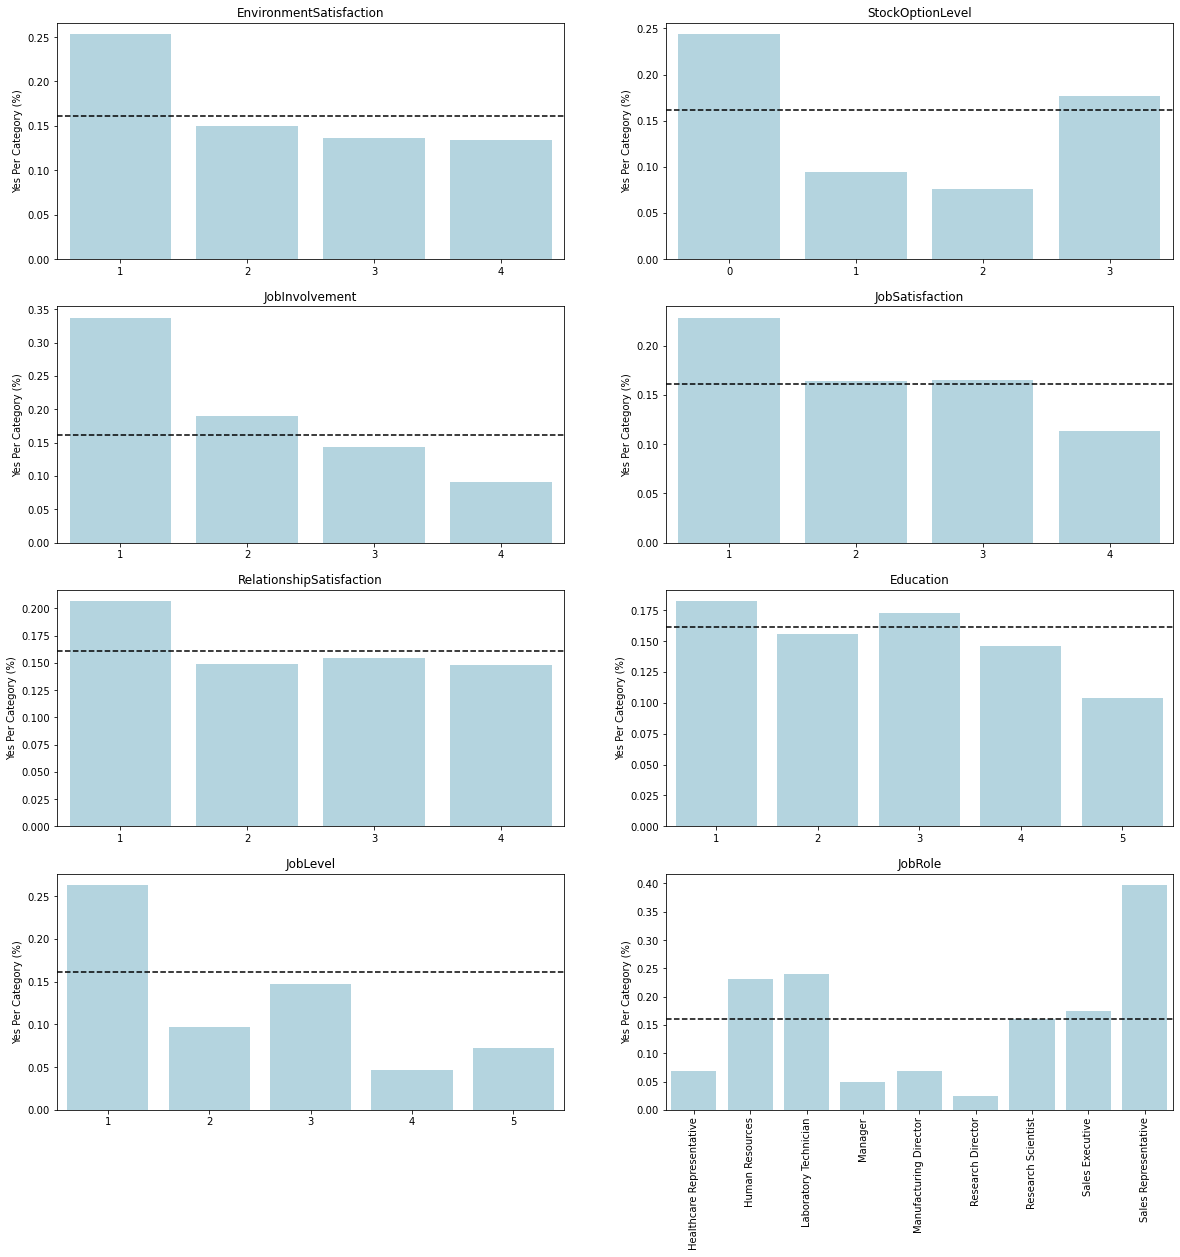

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))


df_tmp = df['Attrition'].value_counts(normalize= True)
avg_yes = df_tmp[ (df_tmp.index == 'Yes')].values[0]


i = 0
j = 0
for col in list_col_catgorical[0:8]:
    df_tmp = df.groupby(['Attrition',col])[col].count().rename('count').to_frame().reset_index()
    df_tmp['count_categorty'] = df_tmp.groupby(col)['count'].transform('sum')
    df_tmp['percentage_yes_per_category'] = df_tmp['count']/df_tmp['count_categorty']
    condition_yes = (df_tmp['Attrition'] == 'Yes')
    df_tmp = df_tmp[condition_yes][[col,'percentage_yes_per_category']]
    sns.barplot(ax=axes[i,j] , data = df_tmp , x=col , y = 'percentage_yes_per_category', color = 'lightblue')
    axes[i,j].set( xlabel = '',ylabel='Yes Per Category (%)' ,title = col)
    axes[i,j].axhline(avg_yes, ls='--' , color = 'black')
    if j == 0:
        j += 1
    else:
        j = 0
        i +=1   

fig, axes = plt.subplots(4, 2, figsize=(20, 20))


i = 0
j = 0
for col in list_col_catgorical[8:16]:
    df_tmp = df.groupby(['Attrition',col])[col].count().rename('count').to_frame().reset_index()
    df_tmp['count_categorty'] = df_tmp.groupby(col)['count'].transform('sum')
    df_tmp['percentage_yes_per_category'] = df_tmp['count']/df_tmp['count_categorty']
    condition_yes = (df_tmp['Attrition'] == 'Yes')
    df_tmp = df_tmp[condition_yes][[col,'percentage_yes_per_category']]
    sns.barplot(ax=axes[i,j] , data = df_tmp , x=col , y = 'percentage_yes_per_category', color = 'lightblue')
    axes[i,j].set( xlabel = '',ylabel='Yes Per Category (%)' ,title = col)
    axes[i,j].axhline(avg_yes, ls='--' , color = 'black')
    if j == 0:
        j += 1
    else:
        j = 0
        i +=1   

col = 'JobRole'
df_tmp = df.groupby(['Attrition',col])[col].count().rename('count').to_frame().reset_index()
df_tmp['count_categorty'] = df_tmp.groupby(col)['count'].transform('sum')
df_tmp['percentage_yes_per_category'] = df_tmp['count']/df_tmp['count_categorty']
condition_yes = (df_tmp['Attrition'] == 'Yes')
df_tmp = df_tmp[condition_yes][[col,'percentage_yes_per_category']]
sns.barplot(ax=axes[i,j] , data = df_tmp , x=col , y = 'percentage_yes_per_category', color = 'lightblue')
axes[i,j].set( xlabel = '',ylabel='Yes Per Category (%)' ,title = col)
axes[i,j].axhline(avg_yes, ls='--' , color = 'black')        
for item in axes[i,j].get_xticklabels():
    item.set_rotation(90)

plt.show()




The above graph shows the relationship between several variables with Attrition. In each subgraph, the attrition rate is calculated for each category. For example, for variable 'Business Travel', the attrition rate among 'Travel_Frequently' employees is 25%, 'Travel_Rarely' is 15% and 'Non-Travel' is 8%. The black dash line in each subgraph is the (unconditional) attrition rate in the data, which is 16%. So, the black dash line shows 16% in each graph. The above graph helps us to get a sense of which variables can be potentially important to explain attrition. Those categories that are way higher than the average attrition rate (black dash line) potentially are those with a significant effect on attrition. For example, for variable 'Business Travel' shows that those who travel frequently are more likely to leave compared to those who do not travel.

**Who is more likely to leave?**
We need to build a model to answer this question accurately. Here, based on the above graph, I provide the initial observations. Those who travel frequently, or work overtime, or have a very bad work-life balance, or are single are more likely to leave. These are all intuitive patterns. 

The education field and the department that an employee works for can also be predictive of attrition. For example, those whose education field is in marketing, human resources, or technical degrees are more likely to leave. Female employees are less likely to leave.

The graph shows that employee satisfaction is also an important factor for attrition. Those employees with very low satisfaction in job, or environment, or relationship are more likely to leave the company. 

It is interesting that those with high education or high job level are less likely to leave. The job role is also an important factor. Sales Representatives are much more likely to leave compared to managers and research directors.


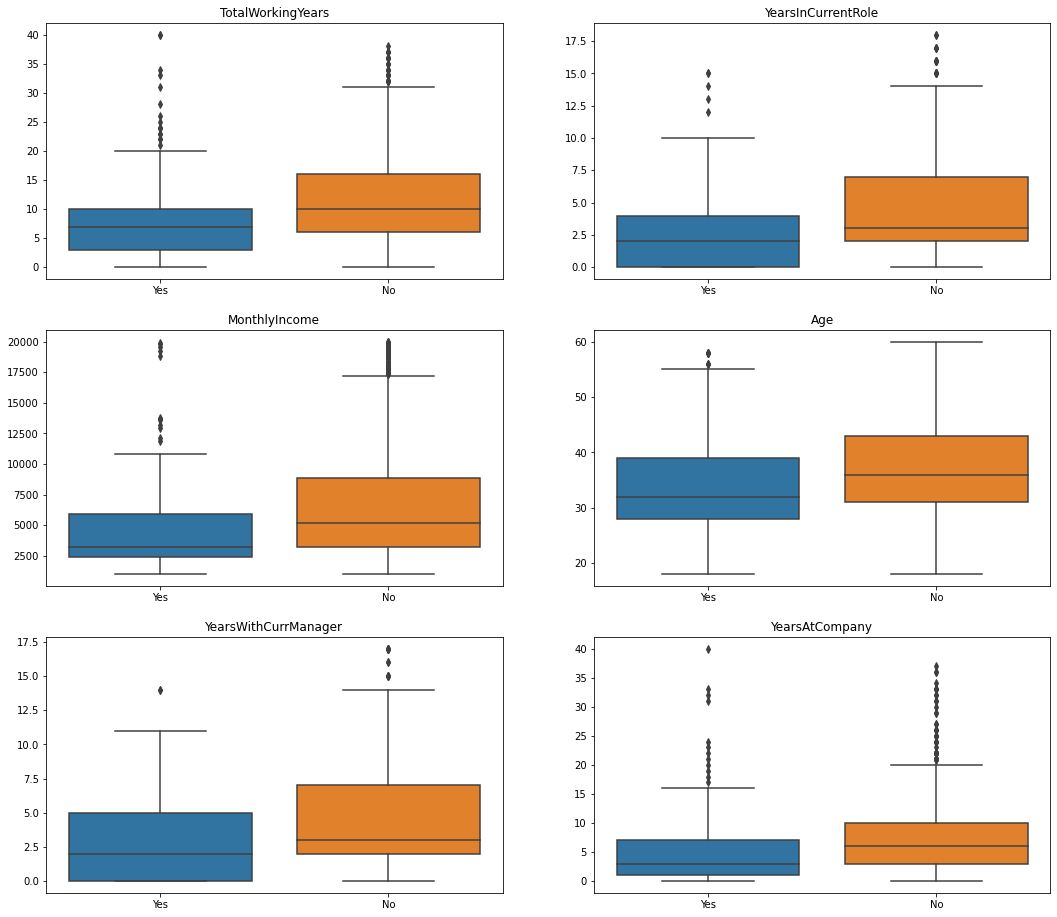

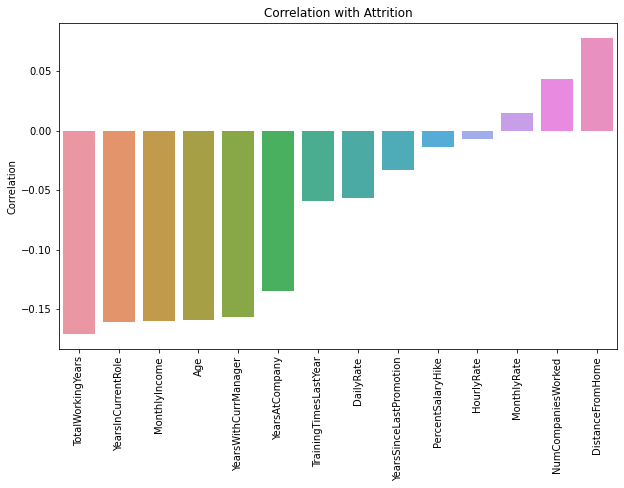

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
list_col_catgorical.append('JobRole')
list_col_numeric = list(df.columns[~df.columns.isin(list_col_catgorical)])
list_col_numeric.remove('Attrition')
df_corr = df[list_col_numeric].corrwith(df['Attrition']).rename('correlation').sort_values().to_frame()
df['Attrition'] = df['Attrition'].map({1: 'Yes', 0: 'No'})

i = 0
j = 0
for col in list(df_corr[df_corr['correlation'] < -0.131].index):
    sns.boxplot(ax=axes[i,j] , data = df , x='Attrition' , y = col)
    axes[i,j].set( xlabel = '',ylabel='' ,title = col)
    if j == 0:
        j += 1
    else:
        j = 0
        i +=1   
        

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(ax = ax, data = df_corr , x=df_corr.index , y = 'correlation')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(ylabel = 'Correlation')   
plt.title('Correlation with Attrition')


plt.show()

The above graphs shows the boxplots for numerical variables with highest correlation with attrition variable. Below the boxplots, I show the correlation graph between attrition and numerical variables.

The above graph shows that those with higher working years and higher years with current manager are less likely to leave. Moreover, those employees with higher income are also less likely to leave. 


# Section 2: Data Modeling

In this section, I develop prediction models for attrition. I compare three models: logistic regression with lasso regularization, random forests, and gradient boosting. 

There are 1470 observations. There 30 features: 16 categorical variables and 14 numerical variables. Note that I drop four variables (EmployeeNumber, Over18, StandardHours, and EmployeeNumber) from the data set. EmployeeNumber variable does not provide any information and the other three have no variation. 

**Lasso Logistic Regression:** I first start with a logistic regression model. I define dummy variables for all the categorical variables. As a result, I use 78 features to build the logistic model. Since there are many features, I use lasso regularization both to reduce the sampling variance and also drop noise variables from the model. I split the data into an 80 percent training set and a 20 percent test set. I use the test set to model selection among lasso logistic, random forests, and gradient boosting. I standardize the data for lasso logistic regression separately for training and test set to avoid any data leakage. I use the training set and 5-fold cross-validation for hyperparameter tuning. I apply grid search with a grid of size 100 to find the optimal penalty. The only parameter that I tune is the lasso penalty parameter. I use the log-loss to evaluate hyperparameter tuning and model selection. The reason is that we want to build a model that predicts 'who will leave next'. To do that we should have a good measure for the probability of leaving to be able to rank who will more likely to leave. Because the data is imbalanced (16 percent of attrition), I also report AUC-ROC, precision, and recall. 

**Random Forest:** I use 30 features for the random forest. I run label encoding on all categorical variables. Note that, unlike lasso logistic regression, I do not use dummy variables because random forests are good in handling categorical variables. I do not do any hyperparameter tuning for the random forest model. 

**Gradient Boosting:** Like the random forest model, I do not use dummy variables. I stick to the 30 features. I use the training set and 5-fold cross-validation to tune the learning rate for the model. I use a grid search with a grid of size 60 to find the optimal learning rate. 


In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score,roc_curve, accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv( 'Employee Test data No. 1.csv' )
df.drop('EmployeeCount',axis = 1, inplace = True)  ## no variation
df.drop('Over18',axis = 1, inplace = True) ## no variation
df.drop('StandardHours',axis = 1, inplace = True)
df.drop('EmployeeNumber',axis = 1, inplace = True)
df.shape

(1470, 31)

In [10]:
list_col_catgorical = list(df.loc[:,(df.dtypes == 'object')].columns)
df_nunq = df.drop(list_col_catgorical,axis = 1).nunique().rename('n_unq').sort_values().to_frame()
list_col_catgorical.extend(list(df_nunq[df_nunq['n_unq']<=5].index))
print('Number of categorical Variables =',len(list_col_catgorical)-1)
print('Categorical Variables =',list_col_catgorical[1:])

Number of categorical Variables = 16
Categorical Variables = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'StockOptionLevel', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'Education', 'JobLevel']


In [11]:
X_cat = df[list_col_catgorical].drop('Attrition',axis = 1)

for col in X_cat.columns:
    X_cat[col] = X_cat[col].astype('category')
    
X_cat = pd.get_dummies(X_cat)  
list_col_numeric = list(df.columns[~df.columns.isin(list_col_catgorical)])
X_cat = X_cat.join(df[list_col_numeric]) 

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [12]:
X_cat.shape

(1470, 78)

In [13]:
## define varibales

y = df['Attrition']

X_dummy_train, X_dummy_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)

X = df.drop('Attrition',axis = 1)
for col in list(X.loc[:,(X.dtypes == 'object')].columns):
    X[col] = LabelEncoder().fit_transform(X[col])

# I use standardized X for lasso regression (X_dummy_train_standard). This included 78 variables
X_dummy_train_standard  = StandardScaler().fit_transform(X_dummy_train)
X_dummy_test_standard   = StandardScaler().fit_transform(X_dummy_test)
X_dummy_standard   = StandardScaler().fit_transform(X_cat)    
    
## X_train and X_test are used for random forest and gradient boosting. This included 30 variables.    
X_train = X.loc[X_dummy_train.index,]
X_test  = X.loc[X_dummy_test.index,]



## Lasso Logistic Regression

In [14]:
def fn_model_logistic(c):

    model_logistic = LogisticRegression(random_state = 42, 
                                          penalty='l1', 
                                          solver = 'liblinear', 
                                          C=c).fit(X_dummy_train_standard,y_train)
    return model_logistic

In [15]:
## cross validation on the training set to find optimal penalty (hyper parameter tuning)
c = 0.001
v_mean_cv = []
v_c = []
for i in range(100):
    v_c.append(c)
    model_logistic = fn_model_logistic(c)
    c *= 1.08
    mean_cv = np.mean(cross_val_score(model_logistic,X_dummy_train_standard,y_train,scoring ='neg_log_loss'))
    v_mean_cv.append(mean_cv)
    

In [16]:
optimal_c = v_c[np.argmax(v_mean_cv)]
print('optimal penalty in lasso logistic regression = ', optimal_c)

optimal penalty in lasso logistic regression =  0.2974116018144029


In [17]:
model_logistic = fn_model_logistic(optimal_c)

In [18]:
## rdefine a function which reports performance metrics both on training and test sets: log-loss, accuracy, recall, precision, AUC-ROC
def print_performance(model,x_train,x_test):
    print('Log_Loss on Training set = ', log_loss(y_train,model.predict_proba(x_train)[:,1] ))
    print('Log_Loss on Test set = ', log_loss(y_test,model.predict_proba(x_test)[:,1] ))
    print('Accuracy on Training set = ', model.score(x_train,y_train) )
    print('Accuracy on Test set = ', model.score(x_test,y_test) )
    print('Recall on Training set = ', recall_score(y_train,model.predict(x_train)) )
    print('Recall on Test set = ', recall_score(y_test,model.predict(x_test)) )
    print('Precision on Training set = ', precision_score(y_train,model.predict(x_train)) )
    print('Precision on Test set = ', precision_score(y_test,model.predict(x_test)) )
    print('ROC-AUC on Training set = ', roc_auc_score(y_train,model.predict_proba(x_train)[:,1]))
    print('ROC-AUC on Test set = ', roc_auc_score(y_test,model.predict_proba(x_test)[:,1]) )

print_performance(model_logistic,X_dummy_train_standard,X_dummy_test_standard)

Log_Loss on Training set =  0.26515335137614854
Log_Loss on Test set =  0.3093731090315545
Accuracy on Training set =  0.9030612244897959
Accuracy on Test set =  0.8843537414965986
Recall on Training set =  0.5252525252525253
Recall on Test set =  0.48717948717948717
Precision on Training set =  0.8387096774193549
Precision on Test set =  0.5757575757575758
ROC-AUC on Training set =  0.902857821569478
ROC-AUC on Test set =  0.8268476621417798


## Random Forest

In [19]:
model_rf = RandomForestClassifier(n_jobs = -1,
                                        n_estimators = 100, 
                                        random_state = 42).fit(X_train,y_train)

print_performance(model_rf,X_train,X_test)

Log_Loss on Training set =  0.09457187108703832
Log_Loss on Test set =  0.3478603983730768
Accuracy on Training set =  1.0
Accuracy on Test set =  0.8809523809523809
Recall on Training set =  1.0
Recall on Test set =  0.1282051282051282
Precision on Training set =  1.0
Precision on Test set =  0.8333333333333334
ROC-AUC on Training set =  1.0
ROC-AUC on Test set =  0.734640522875817


## Gradient Boosting

In [20]:
def fn_model_gb(learning_rate):
    return GradientBoostingClassifier(random_state = 42, loss = 'deviance' , learning_rate = learning_rate, \
            n_estimators = 1000, n_iter_no_change = 10).fit(X_train,y_train)


learning_rate = 0.001
v_mean_cv = []
v_learning_rate = []
for i in range(60):
    v_learning_rate.append(learning_rate)
    model_gb = fn_model_gb(learning_rate)
    learning_rate *= 1.1
    mean_cv = np.mean(cross_val_score(model_gb,X_train,y_train,scoring ='neg_log_loss'))
    v_mean_cv.append(mean_cv)

In [21]:
optimal_learning_rate = v_learning_rate[np.argmax(v_mean_cv)]
print('optimal learning rate in Gradient Boosting = ', optimal_learning_rate)

optimal learning rate in Gradient Boosting =  0.1173908528796958


In [22]:
model_gb = fn_model_gb(optimal_learning_rate)

print_performance(model_gb,X_train,X_test)

Log_Loss on Training set =  0.23473022743833538
Log_Loss on Test set =  0.3416405470164457
Accuracy on Training set =  0.9132653061224489
Accuracy on Test set =  0.8809523809523809
Recall on Training set =  0.5252525252525253
Recall on Test set =  0.23076923076923078
Precision on Training set =  0.9285714285714286
Precision on Test set =  0.6428571428571429
ROC-AUC on Training set =  0.9402718390448453
ROC-AUC on Test set =  0.7556561085972852


## Model Selection

In [23]:
list_rf = [log_loss(y_test,model_rf.predict_proba(X_test)[:,1]),
           model_rf.score(X_test,y_test),
           recall_score(y_test,model_rf.predict(X_test)),
           precision_score(y_test,model_rf.predict(X_test)),
           roc_auc_score(y_test,model_rf.predict_proba(X_test)[:,1])]
           
list_gb = [log_loss(y_test,model_gb.predict_proba(X_test)[:,1]),
           model_gb.score(X_test,y_test),
           recall_score(y_test,model_gb.predict(X_test)),
           precision_score(y_test,model_gb.predict(X_test)),
           roc_auc_score(y_test,model_gb.predict_proba(X_test)[:,1])]

list_logistic = [log_loss(y_test,model_logistic.predict_proba(X_dummy_test_standard)[:,1]),
           model_logistic.score(X_dummy_test_standard,y_test),
           recall_score(y_test,model_logistic.predict(X_dummy_test_standard)),
           precision_score(y_test,model_logistic.predict(X_dummy_test_standard)),
           roc_auc_score(y_test,model_logistic.predict_proba(X_dummy_test_standard)[:,1])]

list_col = ['Log_Loss','Accuracy','Recall','Precision','ROC-AUC']

df_model_selection = pd.DataFrame([list_logistic,list_rf,list_gb], 
                                  columns= list_col, 
        index = ['Lasso Logistic Regression','Random Forest', 'Gradient Boosting'])

df_model_selection

,Log_Loss,Accuracy,Recall,Precision,ROC-AUC
Lasso Logistic Regression,0.309373,0.884354,0.487179,0.575758,0.826848
Random Forest,0.347860,0.880952,0.128205,0.833333,0.734641
Gradient Boosting,0.341641,0.880952,0.230769,0.642857,0.755656


The table above compares the metrics between three models on the test set. Note that I did not use the test set for hyperparameter tuning. I did hyperparameter tuning on the K-fold cross-validation set using the training set. I choose lasso logistic regression over random forest and gradient boosting because it has the lowest Log-Loss on the training set. The good thing is that Lasso Logistic has higher accuracy, recall, and ROC-AUC. The precision of the lasso model is lower. This is not worrying. Because for building an employee attrition model, I prefer a model with higher recall than precision. The reason is that we care a lot about not losing employees. This means we should not make mistakes in predicting that some employees do not leave, but they leave. In other words, we should have a low false negative. Having low precision or high false positive is acceptable. It is probably less costly to incorrectly predict someone will leave, but he will not. 

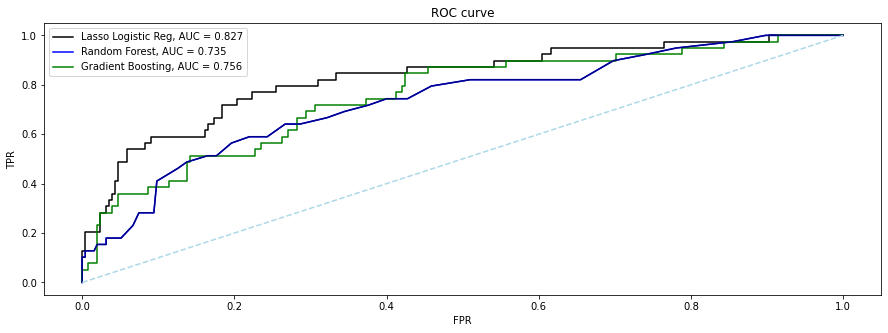

In [24]:
# Show the ROC curve for three models
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, model_logistic.predict_proba(X_dummy_test_standard)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, model_gb.predict_proba(X_test)[:,1])

plt.figure(figsize = (15,5))
plt.plot(fpr_logistic,tpr_logistic , color = 'black',
    label = f'Lasso Logistic Reg, AUC = {np.round(roc_auc_score(y_test,model_logistic.predict_proba(X_dummy_test_standard)[:,1]),3)}')
plt.plot(fpr_rf,tpr_rf , color = 'blue' , 
    label = f'Random Forest, AUC = {np.round(roc_auc_score(y_test,model_rf.predict_proba(X_test)[:,1]),3)}')
plt.plot(fpr_gb,tpr_gb , color = 'green',  
    label = f'Gradient Boosting, AUC = {np.round(roc_auc_score(y_test,model_gb.predict_proba(X_test)[:,1]),3)}')
plt.plot(fpr_rf,tpr_rf , color = 'darkblue')
plt.plot([0, 1], [0, 1], 'k--', color = 'lightblue')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

The above graph shows the ROC curve for three models. We can see that the lasso logistic regression model has significantly a higher AUC compared to other models.

In [25]:
## varibales whose estimated coef is zero

df_coef = pd.DataFrame(model_logistic.coef_.transpose(), columns= ['coef'], index = X_dummy_train.columns)
condition = ( df_coef['coef'].abs() == 0)
print('variables with zero coef in lasso logistic regression =',list(df_coef[condition].index))

variables with zero coef in lasso logistic regression = ['BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'EducationField_Medical', 'EducationField_Other', 'JobRole_Human Resources', 'JobRole_Manufacturing Director', 'MaritalStatus_Married', 'WorkLifeBalance_4', 'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3', 'StockOptionLevel_2', 'JobInvolvement_3', 'JobSatisfaction_2', 'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4', 'Education_2', 'Education_3', 'JobLevel_3']


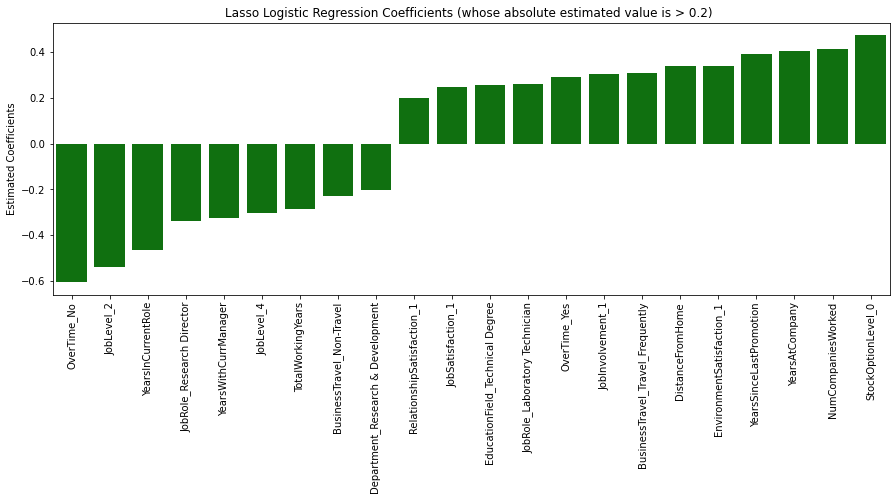

In [26]:
condition = ( df_coef['coef'].abs() > 0.2)

plt.figure(figsize = (15,5))
sns.barplot(data = df_coef[condition].sort_values('coef').reset_index() , x= 'index' , y = 'coef', color = 'green')
plt.title('Lasso Logistic Regression Coefficients (whose absolute estimated value is > 0.2) ')
plt.ylabel('Estimated Coefficients')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

The above graph shows the coefficients estimated in lasso logistic regression. Note that because the data is standardized, the coefficients are comparable. In the graph, I show only coefficients for variables whose absolute value is higher than 0.2. The graph provides accurate support for the actionable insights that I provided in the previous sections. For example, we see that working overtime is an important variable for attrition while having a work-life balance is not an important signal. It is also interesting that satisfaction in job, environment, and relationship are among important signals. This means that over time cannot explain all the low satisfaction. So the company should find out what are the factors that result in satisfaction of the employees. 

In summary, the top five signals for employee attrition are working overtime, having a low job level, not having the stock option, spending fewer years in the current role, and a number of companies that worked before, respectively. 


In [27]:
## top 5 signals
df_coef[['coef']].abs().sort_values('coef', ascending = False).head(5)

,coef
OverTime_No,0.607295
JobLevel_2,0.539411
StockOptionLevel_0,0.473732
YearsInCurrentRole,0.466607
NumCompaniesWorked,0.414537


# Section 2.B: Will Leave vs. Will Leave Next?

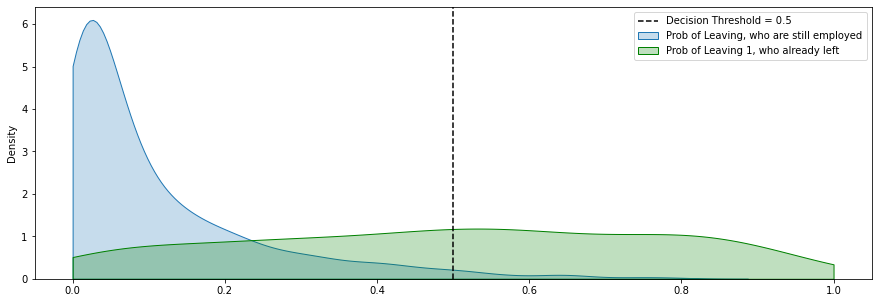

In [28]:
decision_thresh = 0.5
y_predict = 1*(model_logistic.predict_proba(X_dummy_standard)[:,1] >= decision_thresh)
condition = (y == 0)
X_0 = X_dummy_standard[condition]
X_1 = X_dummy_standard[~condition]
prob_0 = model_logistic.predict_proba(X_0)[:,1]
prob_1 = model_logistic.predict_proba(X_1)[:,1]
plt.figure(figsize = (15,5))
sns.kdeplot(data=prob_0 , shade=True,label = 'Prob of Leaving, who are still employed', clip = [0,1])
sns.kdeplot(data=prob_1 , shade=True,label = 'Prob of Leaving 1, who already left', clip = [0,1] , color = 'green')
plt.axvline(decision_thresh, ls='--' , color = 'black',label = f'Decision Threshold = {decision_thresh}') 
plt.legend()
plt.show()

'Who Will Leave Next' is a model in which we find the probability of leaving of those who are still employed in the company. We can rank this probability to find out who is more likely to leave. So we differentiate between employees with different probability of leaving, for example, 0.65 and 0.55. In the model in which we want to find who will leave, we choose a threshold, above which we find those who will leave. For example, we may choose all those with the probability of leaving above 0.5 will leave the company. So we do not differentiate between those with the probability of leaving 0.65 and 0.55.  

The main difference is that in the 'Who Will Leave Next', we should have a good estimate for the probability of leaving. So, I used log loss as the measure of performance for hyperparameter tuning and model selection. In this way, I compare the prediction for the probability of leaving with the true labels. However, in the 'Who Will Leave' model it is better to do hyperparameter tuning and model selection based on metrics in which we compare the prediction of labels with the true labels. For example, it is better to work with accuracy, f1-score, precision, or recall. As we saw earlier, lasso logistic regression has a higher value in AUC-ROC, accuracy, and recall measure. So, for 'who will leave' lasso logistic regression is still the dominant model. 



The above graph shows prediction probability for those who already left the company (attrition) and those who still did not. Using the prediction probability for those who are still employed, we can rank the employees for the probability of leaving. 